## Gold Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## data collection and processing

In [2]:
# loading the csv data to Pandas Data Frame
gold_data = pd.read_csv("gld_price_data.csv")


In [3]:
gold_data.head() # first five rows of data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail() # last five rows of data frame

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape # size of data(row and columns)

(2290, 6)

In [6]:
#getting some basic info about the data 
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values in each column
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation:
     1. Positive Correlation
     2. negative Correlation

In [9]:
correlation = gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

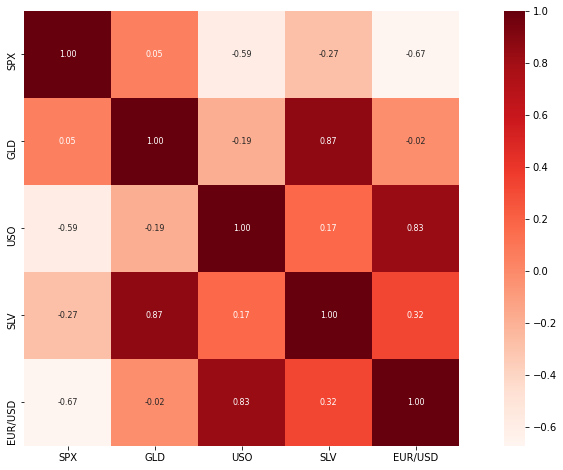

In [10]:
# constructing a heatmap to understand the correaltion
plt.figure(figsize=(16,8))
sns.heatmap(data=correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8},cmap='Reds')

In [11]:
# Correaltion values for GLT
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

c:\users\sashu\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

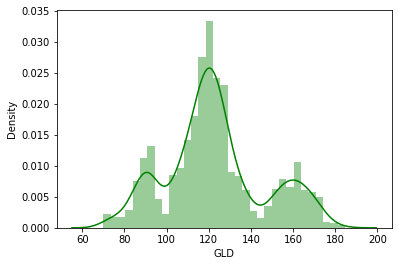

In [12]:
# Checking the value of GLD
sns.distplot(gold_data['GLD'],color = 'green')

# Splitting the Features and Target

In [13]:
X=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data.GLD

In [14]:
X


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [15]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

# Splitting into training and testing data

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=2)

# model training: Random Forest Regressor

In [17]:
regressor = RandomForestRegressor(n_estimators=100)
# training the model
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [18]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
test_data_prediction

array([168.45559897,  82.07069975, 116.12830028, 127.63220091,
       120.98680117, 154.77969816, 150.29139829, 126.0843999 ,
       117.43349861, 125.84020094, 116.80670075, 172.20370041,
       142.04259847, 167.75869769, 115.32340013, 117.52230046,
       139.25110275, 170.09310083, 159.18700265, 159.27219944,
       155.09450006, 125.09959978, 175.05529923, 156.91810334,
       125.14140041,  93.73929956,  77.99929994, 120.73290017,
       119.08439943, 167.53130004,  87.9659006 , 125.27620014,
        91.13850063, 117.64150037, 121.09289915, 136.85640158,
       115.3148013 , 115.01900082, 148.10009999, 107.20510103,
       104.28310269,  87.09779773, 126.56130066, 117.66100014,
       152.58059906, 119.46180002, 108.29500028, 108.10649831,
        93.03260041, 127.01989794,  75.06800011, 113.63889907,
       121.3531005 , 111.27139867, 118.92539893, 120.70349942,
       159.96629968, 167.54540132, 146.95429622,  85.80729869,
        94.31130013,  86.81749923,  90.3148001 , 119.00

In [19]:
# R squared error
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared error: ", error_score)

R squared error:  0.9889017967345236


<AxesSubplot:title={'center':'Actaul price vs Predicted price'}, xlabel='Number of values', ylabel='Gold Values'>

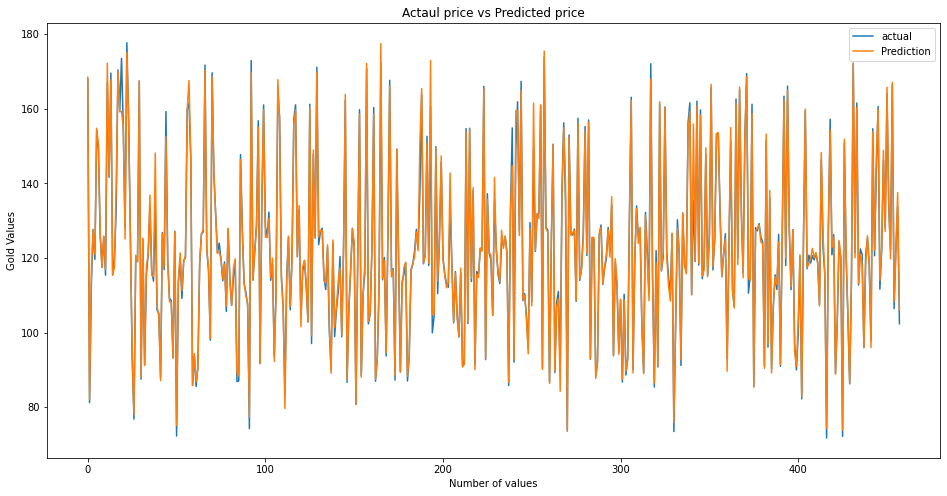

In [20]:
plt.figure(figsize=(16,8))
plt.title("Actaul price vs Predicted price")
plt.xlabel("Number of values")
plt.ylabel("Gold Values")

sns.lineplot(data=list(y_test),label='actual')
sns.lineplot(data=test_data_prediction,label="Prediction")